In [10]:
# importando as bibliotecas
import pandas as pd

# ler os arquivos
clientes_df = pd.read_csv("CadastroClientes.csv", sep=";", decimal=",")
funcionarios_df = pd.read_csv("CadastroFuncionarios.csv", sep=";", decimal=",")
servicos_prestados_df = pd.read_excel("BaseServiçosPrestados.xlsx")

# retirando colunas
funcionarios_df = funcionarios_df.drop(["Estado Civil"], axis=1)

display(clientes_df)
display(funcionarios_df)
display(servicos_prestados_df)

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [28]:
# 1 Calculando a folha salarial da empresa

funcionarios_df["Salario Total"] = funcionarios_df["Salario Base"] + funcionarios_df["Impostos"] + funcionarios_df["Beneficios"] + funcionarios_df["VT"] + funcionarios_df["VR"]
print(f"Total da folha salarial é R$ {funcionarios_df["Salario Total"].sum():,}")

Total da folha salarial é R$ 2,717,493.22


In [31]:
# 2 Faturamento da empresa

# Juntando as tabelas necessárias
faturamento_df = servicos_prestados_df.merge(clientes_df, on="ID Cliente")
faturamento_df["Faturamento"] = faturamento_df["Tempo Total de Contrato (Meses)"] * faturamento_df["Valor Contrato Mensal"]
print(f"O faturamento total é de R$ {faturamento_df["Faturamento"].sum():,}")

O faturamento total é de R$ 5,519,160


In [43]:
# 3 % de funcionários que já fechou algum contrato

Qtde_Funcionarios_Fecharam_Serviço = len(servicos_prestados_df["ID Funcionário"].unique())
Qtde_Funcionários_Totais = len(funcionarios_df["ID Funcionário"])
print(f"A porcentagem de funcionários que fecharam contrato é de {(Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais) * 100:.1f}%")

A porcentagem de funcionários que fecharam contrato é de 86.8%


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

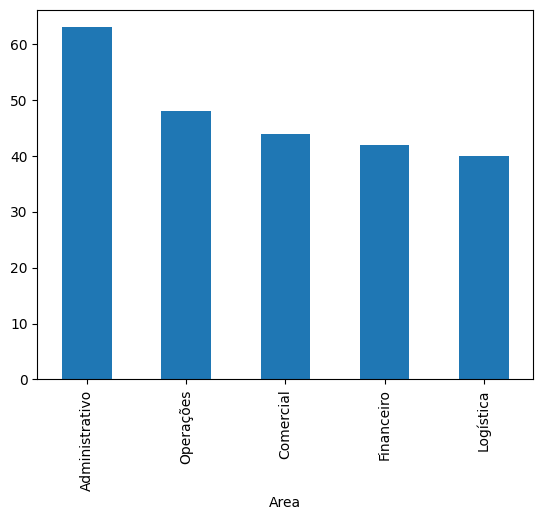

In [61]:
# 4 total de contratos que cada área da empresa já fechou

contratos_area_df = servicos_prestados_df.merge(funcionarios_df[["ID Funcionário", "Area"]], on="ID Funcionário")
contratos_area_qntd = contratos_area_df["Area"].value_counts()
print(contratos_area_qntd)
contratos_area_qntd.plot(kind="bar")


Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

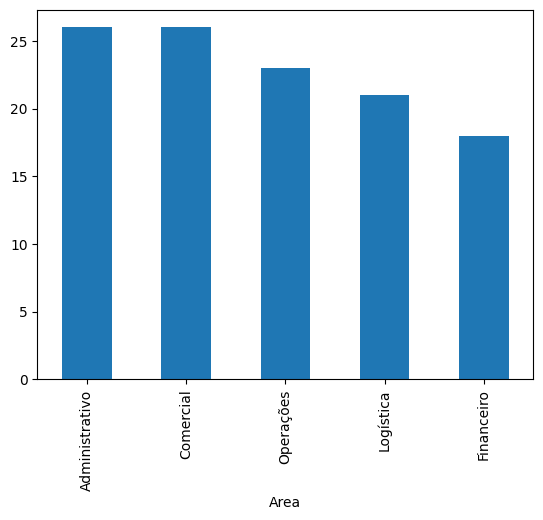

In [62]:
# 5 Total de funcionários por area

total_funcionarios_area = funcionarios_df["Area"].value_counts()
print(total_funcionarios_area)
total_funcionarios_area.plot(kind="bar")

In [60]:
# 6 Ticket médio mensal

ticket_medio = clientes_df["Valor Contrato Mensal"].mean()
print(f"O ticket medio mensal é de {ticket_medio:,.2f}")

O ticket medio mensal é de 2,502.56
